In [32]:
import pandas as pd
import sklearn.model_selection 
import numpy as np 
import seaborn as sns
import category_encoders as ce 

In [33]:
#reading in data 
df = pd.read_csv('listings (1).csv')

In [34]:
pd.set_option('display.max_columns', 500)

In [35]:
df.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.395400e+04,4.395400e+04,0.0,0.0,0.0,4.395400e+04,0.0,43946.000000,43946.000000,0.0,43954.000000,43954.000000,43954.000000,43930.000000,43932.000000,43920.000000,361.000000,43954.000000,43954.000000,43954.000000,43954.000000,43954.000000,43954.000000,43954.000000,43954.000000,43954.00000,43954.000000,43954.000000,43954.000000,43954.000000,43954.000000,43954.000000,34850.000000,34831.000000,34832.000000,34802.000000,34827.000000,34797.000000,34789.000000,43954.000000,43954.000000,43954.000000,43954.000000,35409.000000
mean,2.006361e+07,2.019051e+13,NaN,NaN,NaN,7.241206e+07,NaN,14.103286,14.103286,NaN,34.054272,-118.325310,3.654866,1.443990,1.416553,1.954554,969.534626,1.933703,5.567184,664.671520,5.384857,5.995973,662.823065,664.746530,5.731485,664.03526,12.091641,27.010966,43.168813,160.337512,31.148360,13.360991,94.478135,9.637708,9.436524,9.765674,9.753209,9.688824,9.467015,6.219047,4.386995,1.255403,0.576648,1.889497
std,9.871842e+06,8.011810e+00,NaN,NaN,NaN,7.349640e+07,NaN,83.599759,83.599759,NaN,0.116006,0.153426,2.625939,0.931843,1.086870,1.632337,964.088432,1.751382,22.728471,4853.342063,22.548878,23.215626,4853.378820,4853.326994,22.843980,4853.32243,11.307610,22.493986,33.766460,134.052736,55.932456,20.451140,8.468965,0.840943,0.969247,0.725551,0.746396,0.712463,0.894636,14.879027,14.307145,3.171455,3.677901,1.978425
min,1.090000e+02,2.019051e+13,NaN,NaN,NaN,5.900000e+01,NaN,0.000000,0.000000,NaN,33.338480,-118.934220,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.295395e+07,2.019051e+13,NaN,NaN,NaN,1.135106e+07,NaN,1.000000,1.000000,NaN,34.010025,-118.422670,2.000000,1.000000,1.000000,1.000000,400.000000,1.000000,1.000000,30.000000,1.000000,1.000000,30.000000,30.000000,1.000000,30.00000,0.000000,2.000000,5.000000,30.000000,1.000000,0.000000,93.000000,9.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.370000
50%,2.137156e+07,2.019051e+13,NaN,NaN,NaN,4.255516e+07,NaN,2.000000,2.000000,NaN,34.064040,-118.343060,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,2.000000,2.000000,1125.000000,1125.000000,2.000000,1125.00000,10.000000,26.000000,44.000000,134.000000,8.000000,4.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,0.000000,0.000000,1.160000
75%,2.867802e+07,2.019051e+13,NaN,NaN,NaN,1.220554e+08,NaN,6.000000,6.000000,NaN,34.103510,-118.260810,5.000000,2.000000,2.000000,2.000000,1200.000000,2.000000,3.000000,1125.000000,3.000000,3.000000,1125.000000,1125.000000,3.000000,1125.00000,23.000000,49.000000,77.000000,299.000000,35.000000,19.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.000000,1.000000,0.000000,2.880000
max,3.442641e+07,2.019051e+13,NaN,NaN,NaN,2.598395e+08,NaN,1114.000000,1114.000000,NaN,34.811190,-117.652640,40.000000,15.500000,12.000000,50.000000,7000.00

In [36]:
df.describe(include='all')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.395400e+04,43954,4.395400e+04,43954,43950,42256,32635,43000,43954,28977,22366,27101,27284,27949,30668,0.0,0.0,43954,0.0,4.395400e+04,43954,43946,43946,43795,28844,35643,35643,0.0,43946,43946,43946,35989,43946.000000,43946.000000,43954,43946,43946,43954,41855,43954,0.0,43934,43952,43424,43883,43954,43954,43954,43954.000000,43954.000000,43954,43954,43954,43954.000000,43930.000000,43932.000000,43920.000000,43954,43954,361.000000,43954,5159,4737,33021,37935,43954.000000,43954,43954.000000,43954.000000,43954.000000,43954.000000,43954.000000,43954.000000,43954.000000,43954.00000,43954,43954,43954.000000,43954.000000,43954.000000,43954.000000,43954,43954.000000,43954.000000,35409,35409,34850.000000,34831.000000,34832.000000,34802.000000,34827.000000,34797.000000,34789.000000,43954,838,32456,43954,43954,43954,43954,43954,43954.000000,43954.000000,43954.000000,43954.000000,35409.000000
unique,NaN,43954,NaN,3,43209,38772,29534,40831,1,24235,18400,22278,23173,22370,25203,NaN,NaN,42974,NaN,NaN,25972,8845,3319,965,15733,4,73,NaN,2,25911,25911,369,NaN,NaN,511,2,2,435,162,264,NaN,409,9,573,25,435,1,1,NaN,NaN,2,42,3,NaN,NaN,NaN,NaN,5,40987,NaN,882,726,833,221,297,NaN,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,1,NaN,NaN,NaN,NaN,3,NaN,NaN,2626,1517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,541,11,2,1,9,2,2,NaN,NaN,NaN,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/3780875,NaN,2019-05-06,Greenleaf Hotel,When you stay in a Zeus property you will be m...,When you stay in a Zeus property you will be m...,When you stay in a Zeus property you will be m...,none,Santa Monica is one of the most walk-able area...,"- Rent total includes taxes, cleaning and book...","If you plan on driving, the Waze app is one of...","Upon arrival, guests are provided with an acce...",- I give my guests space but am available when...,- This property is professionally managed by C...,NaN,NaN,https://a0.muscache.com/im/pictures/41940512-f...,NaN,NaN,https://www.airbnb.com/users/show/129783732,David,2015-11-02,"Los Angeles, California, United States",Oranj Palm Vacation Homes and Catalina Island ...,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/user/23601...,https://a0.muscache.com/im/pictures/user/23601...,Hollywood,NaN,NaN,"['email', 'phone', 'reviews', 'kba']",t,f

In [37]:
df = df.drop([
'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered',
'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'host_picture_url', 'street', 'state', 'market',
'smart_location', 'country', 'square_feet', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60',
'availability_90', 'availability_365', 'calendar_last_scraped', 'first_review', 'last_review', 'license', 'jurisdiction_names',
'is_business_travel_ready', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'host_verifications', 'host_has_profile_pic',
'host_identity_verified', 'host_listings_count', 'host_total_listings_count', 'host_response_time', 'host_response_rate',
'host_is_superhost', 'neighbourhood_group_cleansed', 'city', 'country_code', 'is_location_exact', 'monthly_price', 'minimum_nights',
'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'requires_license', 'require_guest_profile_picture', 'require_guest_phone_verification',
'weekly_price', 'host_neighbourhood', 'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy',
'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
'review_scores_value', 'instant_bookable', 'cancellation_policy', 'reviews_per_month', 'neighbourhood', 'neighbourhood_cleansed',
'latitude', 'longitude', 'guests_included', 'extra_people', 'security_deposit'], axis=1)

In [38]:
# dropped most columns to create baseline model 
df.head()

,id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee
0,20862235,90402,Apartment,Entire home/apt,2,1.0,0.0,2.0,Real Bed,"{TV,Wifi,Kitchen,""Pets allowed"",""Free street p...",$105.00,$120.00
1,26165453,90291,Cottage,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",$145.00,$125.00
2,23371066,90403,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,""Free street parking"",""Indoor...",$75.00,$45.00
3,29922373,90272,Villa,Entire home/apt,8,6.0,5.0,5.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...","$5,000.00",NaN
4,20541717,90401,Apartment,Entire home/apt,2,1.0,1.0,0.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",$120.00,$65.00


In [39]:
df = df.drop(['amenities'], axis=1)

In [40]:
#Connor's feature cleaning 
#cleaning 'price' feature and adding it to 'cleaning fee' 

df['price'] = df['price'].str.strip('$')
df['cleaning_fee'] = df['cleaning_fee'].str.strip('$')

In [41]:
df['price'] = df['price'].str.replace(',', '')
df['cleaning_fee'] = df['cleaning_fee'].str.replace(',', '')

In [42]:
df['price'] = df['price'].astype(float)
df['cleaning_fee'] = df['cleaning_fee'].astype(float)


In [43]:
df['cleaning_fee'] = df['cleaning_fee'].replace(np.nan, 0)

In [44]:
df['total_price'] = df['price'] + df['cleaning_fee']

In [45]:
df = df.drop(['price', 'cleaning_fee'], axis=1)

In [46]:
df.head()

,id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,total_price
0,20862235,90402,Apartment,Entire home/apt,2,1.0,0.0,2.0,Real Bed,225.0
1,26165453,90291,Cottage,Entire home/apt,2,1.0,1.0,1.0,Real Bed,270.0
2,23371066,90403,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,120.0
3,29922373,90272,Villa,Entire home/apt,8,6.0,5.0,5.0,Real Bed,5000.0
4,20541717,90401,Apartment,Entire home/apt,2,1.0,1.0,0.0,Real Bed,185.0


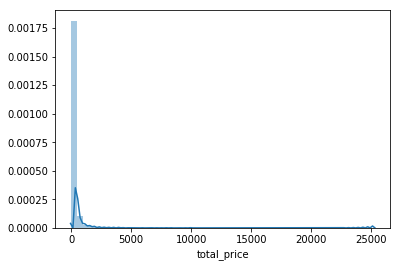

In [47]:
#right skewed, will log transform 
sns.distplot(df['total_price']);

In [48]:
#df['amenities'].to_list()

In [49]:
#will have to deal with NaNs
df.isna().sum()

id                 0
zipcode          530
property_type      0
room_type          0
accommodates       0
bathrooms         24
bedrooms          22
beds              34
bed_type           0
total_price        0
dtype: int64

In [50]:
df= df.dropna()
df['bathrooms'] = df['bathrooms'].fillna(value=np.mean(df['bathrooms']))
df['bedrooms'] = df['bedrooms'].fillna(value=np.mean(df['bedrooms']))
df['beds'] = df['beds'].fillna(value=np.mean(df['beds']))

In [51]:
df.isna().sum()

id               0
zipcode          0
property_type    0
room_type        0
accommodates     0
bathrooms        0
bedrooms         0
beds             0
bed_type         0
total_price      0
dtype: int64

In [52]:
features = ['id',
 'zipcode',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type']

target = ['total_price']

df_features = df[features]
df_target = df[target]

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size = 0.2)

In [54]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((34692, 9), (34692, 1), (8673, 9), (8673, 1))

In [55]:
def log_transform(y_train, y_test):
    y_train = y_train.copy()
    y_test = y_test.copy()
    
    y_train = np.log(y_train)
    y_test = np.log(y_test)
    return y_train, y_test

In [56]:
y_train, y_test = log_transform(y_train, y_test)
y_train.shape, y_test.shape

((34692, 1), (8673, 1))

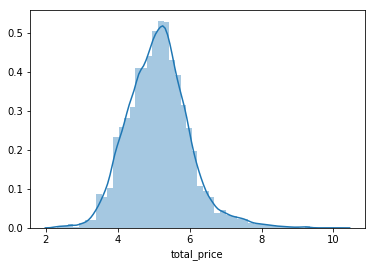

In [57]:
#'total_price' now more akin to a normal dist as expected 
sns.distplot(y_train['total_price']);

In [58]:
def encode(X_train, X_test):
    X_train = X_train.copy()
    X_test = X_test.copy()
    
    encode = ce.OrdinalEncoder()
    X_train = encode.fit_transform(X_train)
    X_test = encode.fit_transform(X_test)
    
    return X_train, X_test 

In [59]:
X_train, X_test = encode(X_train, X_test)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((34692, 9), (8673, 9), (34692, 1), (8673, 1))

In [60]:
X_train.head()

,id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type
8109,23311156,1,1,1,6,2.0,3.0,3.0,1
8609,25130670,2,1,2,1,1.0,1.0,1.0,1
12418,18674469,3,2,3,3,1.0,1.0,2.0,1
26525,11741274,4,3,3,4,1.0,1.0,2.0,2
19106,32988731,5,2,2,1,1.0,1.0,1.0,1


In [61]:
#X_train['amenities'].value_counts().sort_values().tail()

In [62]:
X_train.isna().sum()

id               0
zipcode          0
property_type    0
room_type        0
accommodates     0
bathrooms        0
bedrooms         0
beds             0
bed_type         0
dtype: int64

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
model = RandomForestRegressor(max_depth = None, n_estimators=150, 
                               n_jobs = -1, random_state = 42)

model.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [65]:
#reasonable score given the low MAE value below
model.score(X_test, y_test)

0.7345603503921598

In [66]:
y_pred = model.predict(X_test)

In [67]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred )
mae

0.32354370073803546

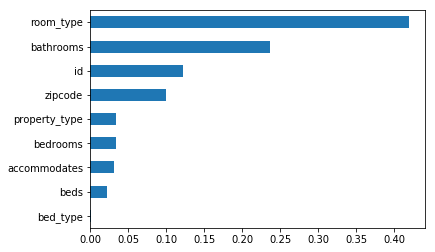

In [68]:
#it would be important to find a way to encode the 'amenities' variable 
import matplotlib.pyplot as plt 

importances = pd.Series(model.feature_importances_, X_test.columns).sort_values()
importances.plot.barh()